# ORIE 5355/INFO 5370 HW 3: Algorithmic Pricing

 - Name: Martin Sun
 - Net-id: ms2923
 - Date: 2021-10-14
 - Late days used for this assignment:
 - Total late days used (counting this assignment):
 - People with whom you discussed this assignment: 

After you finish the homework, please complete the following (short, anonymous) post-homework survey: https://forms.gle/1SxoC4YoBhUQiwPP7 and include the survey completion code below.

### Question 0 [2 points]
<font color='blue'> Survey completion code: 

We have marked questions in <font color='blue'> blue </font>. Please put answers in black (do not change colors). You'll want to write text answers in "markdown" mode instead of code. In Jupyter notebook, you can go to Cell > Cell Type > Markdown, from the menu. Please carefully read the late days policy and grading procedure [here](https://orie5355.github.io/Fall_2021/assignments/). 

# Conceptual component [6 points]

Please complete the following pricing ethics scenario questionaire: https://forms.gle/DK4djayEar2ZX92y6, and include the survey completion code below. **We will discuss these issues in class on either 10/18 or 10/20 (Exact date to be announced). You must complete the questionaire before the day of that class, even if you turn in the rest of the homework later. The questionaire will close the morning of the class that we discuss these issues.**

<font color='blue'> Survey completion code: hw3_pricingethics_2021

<font color='blue'> Survey completion code: Based on the first letter of your first name, explain your answers to the following questions, in at most three sentences each.

First letter A-C: 1, 6, 11, 16

First letter D-H: 2, 7, 12, 17

First letter I-M: 3, 8, 13, 18

First letter N-S: 4, 9, 14, 19

First letter T-Z: 5, 10, 15, 20

3: More or less simply supply and demand which happens all the time. When something has much higher demand, offerers will tend to get more value from it. There is nothing unfair about that.

8: This is fair pricing strategy. The places with lots of competition are required to reduce prices to stay afloat, however nothing unethical occurs
when this is not done in a non-competitive area (unless it is exploitative of a community).

13: This is unfair solely because the neighbourhood is disadvantaged. The higher prices are due to higher buyer perceived value, but that may be because this community needs the item that much more. Essential items should not be priced higher in disadvantaged communities.

18: The fact is that drivers need to spend more time and money to get to these passengers. It doesn't matter who the passengers are - the drivers should be compensated somewhat for this extra distance. It's also not an essential product but rather more of a convenience/luxury service.

<font color='blue'> Be prepared to discuss your answers to at least these questions in class (I might randomly call on people), but you should also be willing/able to discuss your answers to other questions. 

# Programming component

## Helper code

In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_theme()
import os, sys, math
import matplotlib.pyplot as plt

In [5]:
df_train = pd.read_csv('HW3_data_train.csv')
test_demand_curve = pd.read_csv('test_demand.csv')

In [6]:
df_train.head()

,Location,Income,Offered price,Purchased
0,Africa,10.38,3.16,False
1,Europe,26.33,3.47,True
2,Europe,24.06,3.78,True
3,Africa,16.18,3.74,False
4,Asia Pacific,13.73,4.75,False


In [7]:
df_train.shape, test_demand_curve.shape

((4000, 4), (199, 2))

## Problem 1: Demand estimation and pricing without covariates

First, we will use the training data to construct estimates of the demand at each price without leveraging the covariates, and then use that estimated function to calculate optimal prices.

### 1a) Naive method: empirical estimate of demand $d(p)$ at each price

<font color='blue'> Fill in the below function, that takes in a dataframe and the number of bins into which to separate the historical prices. The function should output a dataframe that has one row for each price bin, with two columns: the bin interval, and the estimated demand $d(p)$ (the fraction of potential customers who purchase at price $p$) in that bin.  
    
Use the following function to create bins:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

In [8]:
# Example with 10 bins:
# df_train['bin_with_10_bins'] = pd.qcut(df_train['Offered price'], 10)
# df_train.head()
# grouped_df = df_train.groupby(['bin_with_10_bins'])['Purchased'].sum().reset_index(name ='count')
# grouped_df['count'].sum()
# df_train.groupby(['bin_with_10_bins'])['Purchased'].count()

For example, with 2 bins and passing in df_train to the function, you should see the following output:

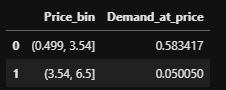

In [9]:
def create_empirical_estimate_demand_df(df, number_of_pricing_bins):
    df['bin'] = pd.qcut(df['Offered price'], number_of_pricing_bins)
    grouped = df.groupby(['bin'])['Purchased'].sum().reset_index(name ='count')
    total_per_bin = df.groupby(['bin'])['Purchased'].count()
    grouped['demand'] = grouped['count'].divide(total_per_bin.values)
    return grouped.drop('count', axis=1)

In [10]:
demand_df = create_empirical_estimate_demand_df(df_train, 10)

<font color='blue'> Fill in the below function, that takes in a single price and your empirical df from the above function and outputs the prediction for the demand $d(p)$ at that price.

In [11]:
def get_prediction_empirical(empirical_df, price):
    min = empirical_df['bin'].iloc[0].left
    max = empirical_df['bin'].iloc[-1].right
    if price < min:
        price = min
    elif price > max:
        price = max
    demand = empirical_df.loc[empirical_df['bin'].apply(lambda a: a.left <= price <= a.right)]['demand'].iloc[0]
    return demand

In [12]:
prices_to_predict = np.linspace(min(df_train['Offered price']), max(df_train['Offered price']), 200)

<font color='blue'> Plot in a single figure the outputs of your function as a line plot -- where the X axis corresponds to prices in `prices_to_predict` and the Y axis the predicted Demand at that price -- for the following three inputs to the function:
    
    1. the dataframe is the first 100 rows of df_train, with 10 bins.
    
    2. the dataframe is the first 500 rows of df_train, with 10 bins.
    
    3. the dataframe is all the rows of df_train, with 10 bins.

<font color='blue'> In the same figure, include the "true" test-time demand curve, `test_demand_curve`. 

In [13]:
n_bins = 10
df1 = create_empirical_estimate_demand_df(df_train.iloc[:100], n_bins)
df2 = create_empirical_estimate_demand_df(df_train.iloc[:500], n_bins)
df3 = create_empirical_estimate_demand_df(df_train, n_bins)

In [14]:
pred_demand1 = [get_prediction_empirical(df1, price) for price in prices_to_predict]
pred_demand2 = [get_prediction_empirical(df2, price) for price in prices_to_predict]
pred_demand3 = [get_prediction_empirical(df3, price) for price in prices_to_predict]

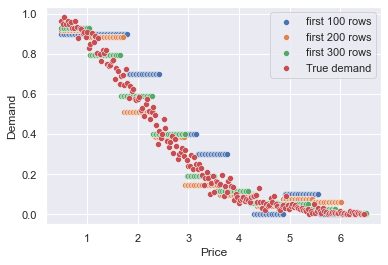

In [15]:
sns.scatterplot(prices_to_predict,pred_demand1)
sns.scatterplot(prices_to_predict,pred_demand2)
sns.scatterplot(prices_to_predict,pred_demand3)
sns.scatterplot(test_demand_curve.iloc[:,0],test_demand_curve.iloc[:,1])
plt.ylabel('Demand')
plt.legend(['first 100 rows','first 200 rows','first 300 rows','True demand']);

<font color='blue'> Do the same plot, except now you're using 50 bins for each of the three data frames.

In [16]:
n_bins = 50
df1 = create_empirical_estimate_demand_df(df_train.iloc[:100], n_bins)
df2 = create_empirical_estimate_demand_df(df_train.iloc[:500], n_bins)
df3 = create_empirical_estimate_demand_df(df_train, n_bins)

In [17]:
pred_demand_50_1 = [get_prediction_empirical(df1, price) for price in prices_to_predict]
pred_demand_50_2 = [get_prediction_empirical(df2, price) for price in prices_to_predict]
pred_demand_50_3 = [get_prediction_empirical(df3, price) for price in prices_to_predict]

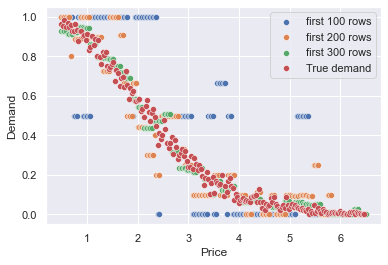

In [18]:
sns.scatterplot(prices_to_predict,pred_demand_50_1)
sns.scatterplot(prices_to_predict,pred_demand_50_2)
sns.scatterplot(prices_to_predict,pred_demand_50_3)
sns.scatterplot(test_demand_curve.iloc[:,0],test_demand_curve.iloc[:,1])
plt.ylabel('Demand')
plt.legend(['first 100 rows','first 200 rows','first 300 rows','True demand']);

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using more data and more bins?

The estimated demand follows the "true" demand curve reasonably well. Of course, the more rows of data we use, the more
accurate the data appears to be. Additionally, the more bins we have, the less data we have for each bin, which appears
to dramatically reduce the prediction precision when we have a limited number of rows, because there is so little data
for each bin.

### 1b) Demand estimation using logistic regression

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should just have two coefficients: one for the intercept, and one for the price. The function takes in a dataframe that you will use as your training data for your model, and should return your fitted model. 

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
# encoded_df = pd.get_dummies(df_train.drop('bin', axis=1), drop_first=True)
# X = encoded_df.drop('Purchased', axis=1)
# Y = encoded_df['Purchased']
# encoded_df

In [21]:
def fit_logistic_regression_demand_just_on_price(df):
    X = df['Offered price']
    Y = df['Purchased']
    model = LogisticRegression()
    model.fit(X.values.reshape(-1,1), Y)
    return model

<font color='blue'> Fill in the below function, that takes in a single price and your trained model and outputs the prediction for the demand $d(p)$ at that price.

In [22]:
def get_prediction_logistic(fitted_model, price):
    return fitted_model.predict_proba(np.array([price]).reshape(-1,1))[0,1]

<font color='blue'> For each of the three training dataframes as in part A, fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function. Generate the same lineplot as above. Also include the "true" test-time demand curve, `test_demand_curve`. 

In [23]:
def get_logistic_predictions(df_subset, prices_to_predict):
    lr_model = fit_logistic_regression_demand_just_on_price(df_subset)
    pred_demand = [get_prediction_logistic(lr_model, price) for price in prices_to_predict]
    return pred_demand

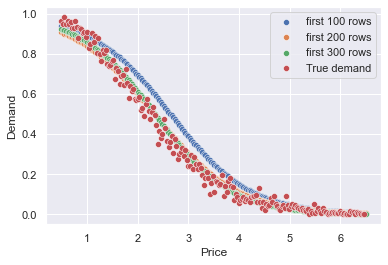

In [24]:
lr_pred1 = get_logistic_predictions(df_train.iloc[:100], prices_to_predict)
lr_pred2 = get_logistic_predictions(df_train.iloc[:500], prices_to_predict)
lr_pred3 = get_logistic_predictions(df_train, prices_to_predict)

sns.scatterplot(prices_to_predict,lr_pred1)
sns.scatterplot(prices_to_predict,lr_pred2)
sns.scatterplot(prices_to_predict,lr_pred3)
sns.scatterplot(test_demand_curve.iloc[:,0],test_demand_curve.iloc[:,1])
plt.ylabel('Demand')
plt.legend(['first 100 rows','first 200 rows','first 300 rows','True demand']);

<font color='blue'> Comment on your output in no more than 3 sentences. What is the effect of using logistic regression instead of the empirical distribution? 

Fitting the probability based on a continuous sigmoid function as in logistic regression gives us a very smooth predicted
demand, as we expect - the precision is high. With empirical binned estimates, we cannot get the same continuous estimate, and can only estimate based on demand per bin, which is discrete and choppy.
The logistic model appears very accurate aside from the 100 row subset (lack of data), meaning that true demand is rather continuous and non-anomalous for this case.



### 1c) Optimal pricing using your demand estimates

<font color='blue'> Fill in the following function that takes in two lists: a list of prices, and a list of predicted demand d(p) at that price. The function outputs the revenue maximizing price given the data and the corresponding revenue. You may use a "brute force" technique, that loops through all the possible prices and calculates the revenue using that price. 

In [25]:
def get_revenue_maximizing_price_and_revenue(price_options, demand_predictions):
    revenues = []
    for option in range(len(price_options)):
        revenue = price_options[option]*demand_predictions[option]
        revenues.append(revenue)
    best = np.argmax(revenues)
    return price_options[best], revenues[best]

<font color='blue'> Print out the optimal price and the predicted optimal revenue from the predictions for your naive and logistic models, using 100 rows and all the data, each. 

In [26]:
print('Price, Revenue for Naive models:')
print([get_revenue_maximizing_price_and_revenue(prices_to_predict,pred) for pred in [pred_demand1,pred_demand2,pred_demand3]])
print('Price, Revenue for Logistic models:')
print([get_revenue_maximizing_price_and_revenue(prices_to_predict,pred) for pred in [lr_pred1,lr_pred2,lr_pred3]])

Price, Revenue for Naive models:
[(2.42964824120603, 1.700753768844221), (1.7060301507537687, 1.5053207212533253), (2.278894472361809, 1.348157868550674)]
Price, Revenue for Logistic models:
[(2.1884422110552766, 1.4070878495510661), (2.007537688442211, 1.2038956372592826), (1.9773869346733668, 1.2295480454251977)]


<font color='blue'> Now, we're going to use the "true" test-time demand curve, `test_demand_curve`. For each of the above predicted optimal prices, calculate the revenue resulting from that price used on the true demand curve. Also print out the true optimal price and corresponding revenue for that curve.  

In [27]:
def get_matched_demand_vector(corrected_df, price_vector):
    demand_vector = [corrected_df.loc[(corrected_df['Price_bin_left'] <= a) & (corrected_df['Price_bin_right'] >= a)]['Demand_at_price'].iloc[0] for a in price_vector]
    return demand_vector

In [28]:
test_demand_curve_corrected = pd.read_csv('test_demand2.csv')
true_demand_matched = get_matched_demand_vector(test_demand_curve_corrected, prices_to_predict)

print('Price, Revenue for true data from "test_demand":')
print(get_revenue_maximizing_price_and_revenue(prices_to_predict,true_demand_matched))

Price, Revenue for true data from "test_demand":
(2.0979899497487438, 1.2008231949219783)


<font color='blue'> How do your estimates compare to the actual revenue? Discuss in no more than 3 sentences. 

The estimates are quite good - our empirical Naive estimate gave us an optimal price of 2.28 at 1.35 estimated revenue while
the logistic model gave us an optimal price of 1.98 at a 1.23 estimated revenue. The true value output an optimal price of 2.10
at 1.2 revenue, which is close to estimations (although estimations appear to overestimate demand slightly). Because our demand
estimations aren't perfect, our optimal pricing is also imperfect.


# Problem 2: Demand estimation and pricing with covariates 

Now, we are going to ask you to do personalized pricing, based on just a two binarized covariates. 

First, take `df_train` and create a new column for "low" and "high" wealth, based on if the income level is above or below the median income level. Second, create a new column for Location: `1` if the location is either America, and `0` if the location is anything else.

For this section, we will use all the df_train data, as opposed to just the first few rows.

In [29]:
median_income = df_train['Income'].median()
df_train['High Wealth'] = 0
df_train['High Wealth'].loc[df_train['Income'] >= median_income] = 1
df_train_2 = pd.get_dummies(df_train, columns=['Location']).drop(['Income','Location_Africa', 'Location_Asia Pacific', 'Location_Europe', 'bin'], axis=1)

### 2a) Demand estimation

<font color='blue'> First, Fill in the below function that fits a logistic regression to predict the probability of purchase at a price ($d(p)$). The logistic regression should now have more coefficients than before: 1 for each covariate, and any interactions (including interactions between price and covariates) that you wish to add. If you add more interactions, you may wish to add regularization. 

In [30]:
def fit_logistic_regression_demand_with_covariates(df):
    X = df.drop('Purchased', axis=1)
    Y = df['Purchased']
    model = LogisticRegression()
    model.fit(X,Y)
    return model

cov_model = fit_logistic_regression_demand_with_covariates(df_train_2)

<font color='blue'> Fill in the below function, that takes in a single price, covariates, and your trained model, and outputs the prediction for the demand $d(p)$ at that price. For example, one of the covariate inputs to the function can be `['NotAmerica', 'LowWealth']`.

In [31]:
def get_prediction_logistic_covariates(fitted_model, price, covariates):
    input = np.zeros(3)
    input[0] = price

    if 'America' in covariates:
        input[2] = 1
    if 'HighWealth' in covariates:
        input[1] = 1

    return fitted_model.predict_proba(input.reshape(1,-1))[0,1]

In [32]:
test_demand_curve_America_HighWealth = pd.read_csv('test_demand_America_HighWealth2.csv')
test_demand_curve_NotAmerica_HighWealth = pd.read_csv('test_demand_NotAmerica_HighWealth2.csv')
test_demand_curve_America_LowWealth = pd.read_csv('test_demand_America_LowWealth2.csv')
test_demand_curve_NotAmerica_LowWealth = pd.read_csv('test_demand_NotAmerica_LowWealth2.csv')

true_America_HighWealth = get_matched_demand_vector(test_demand_curve_America_HighWealth, prices_to_predict)
true_NotAmerica_HighWealth = get_matched_demand_vector(test_demand_curve_NotAmerica_HighWealth, prices_to_predict)
true_America_LowWealth = get_matched_demand_vector(test_demand_curve_America_LowWealth, prices_to_predict)
true_NotAmerica_LowWealth = get_matched_demand_vector(test_demand_curve_NotAmerica_LowWealth, prices_to_predict)

<font color='blue'> Fit a model and get the predictions for each of the prices in `prices_to_predict` using your above function and each unique covariate combination.
    
<font color='blue'> For each covariate combination, generate the same lineplot as in 1a and 1b (separately for each covariate combination). Also include the "true" test-time demand curve for the appropriate covariate combination (For example, `test_demand_NotAmerica_HighWealth`).

In [33]:
pred_America_HighWealth = [get_prediction_logistic_covariates(cov_model, a, ['America','HighWealth']) for a in prices_to_predict]
pred_NotAmerica_HighWealth = [get_prediction_logistic_covariates(cov_model, a, ['NotAmerica','HighWealth']) for a in prices_to_predict]
pred_America_LowWealth = [get_prediction_logistic_covariates(cov_model, a, ['America','LowWealth']) for a in prices_to_predict]
pred_NotAmerica_LowWealth = [get_prediction_logistic_covariates(cov_model, a, ['NotAmerica','LowWealth']) for a in prices_to_predict]

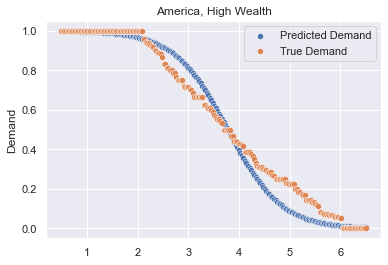

In [34]:
sns.scatterplot(prices_to_predict,pred_America_HighWealth)
sns.scatterplot(prices_to_predict,true_America_HighWealth)
plt.ylabel('Demand')
plt.legend(['Predicted Demand','True Demand'])
plt.title('America, High Wealth');

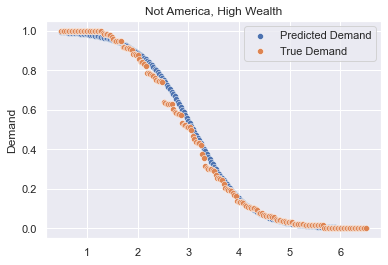

In [35]:
sns.scatterplot(prices_to_predict,pred_NotAmerica_HighWealth)
sns.scatterplot(prices_to_predict,true_NotAmerica_HighWealth)
plt.ylabel('Demand')
plt.legend(['Predicted Demand','True Demand'])
plt.title('Not America, High Wealth');

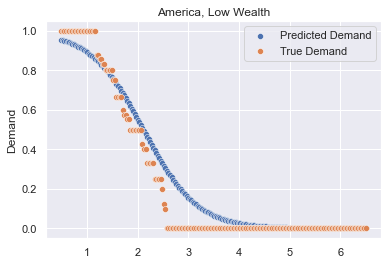

In [36]:
sns.scatterplot(prices_to_predict,pred_America_LowWealth)
sns.scatterplot(prices_to_predict,true_America_LowWealth)
plt.ylabel('Demand')
plt.legend(['Predicted Demand','True Demand'])
plt.title('America, Low Wealth');

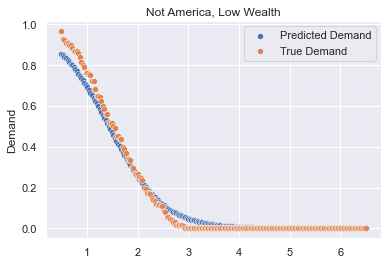

In [37]:
sns.scatterplot(prices_to_predict,pred_NotAmerica_LowWealth)
sns.scatterplot(prices_to_predict,true_NotAmerica_LowWealth)
plt.ylabel('Demand')
plt.legend(['Predicted Demand','True Demand'])
plt.title('Not America, Low Wealth');


### 2b) Pricing

<font color='blue'> Now, use your code from 1c to output predicted optimal prices, predicted revenue, and and actual revenue using the test data curve, for each covariate combination. 

In [38]:
prices = np.zeros([2,4])
revenues = np.zeros([2,4])

prices[0,0], revenues[0,0] = get_revenue_maximizing_price_and_revenue(prices_to_predict, pred_America_HighWealth)
prices[1,0], revenues[1,0] = get_revenue_maximizing_price_and_revenue(prices_to_predict, true_America_HighWealth)
print('America, High Wealth, Predicted over True: Optimal Price, Revenue')
print(get_revenue_maximizing_price_and_revenue(prices_to_predict, pred_America_HighWealth))
print(get_revenue_maximizing_price_and_revenue(prices_to_predict, true_America_HighWealth))

prices[0,1], revenues[0,1] = get_revenue_maximizing_price_and_revenue(prices_to_predict, pred_NotAmerica_HighWealth)
prices[1,1], revenues[1,1] = get_revenue_maximizing_price_and_revenue(prices_to_predict, true_NotAmerica_HighWealth)
print('Not America, High Wealth, Predicted over True: Optimal Price, Revenue')
print(get_revenue_maximizing_price_and_revenue(prices_to_predict, pred_NotAmerica_HighWealth))
print(get_revenue_maximizing_price_and_revenue(prices_to_predict, true_NotAmerica_HighWealth))

prices[0,2], revenues[0,2] = get_revenue_maximizing_price_and_revenue(prices_to_predict, pred_America_LowWealth)
prices[1,2], revenues[1,2] = get_revenue_maximizing_price_and_revenue(prices_to_predict, true_America_LowWealth)
print('America, Low Wealth, Predicted over True: Optimal Price, Revenue')
print(get_revenue_maximizing_price_and_revenue(prices_to_predict, pred_America_LowWealth))
print(get_revenue_maximizing_price_and_revenue(prices_to_predict, true_America_LowWealth))

prices[0,3], revenues[0,3] = get_revenue_maximizing_price_and_revenue(prices_to_predict, pred_NotAmerica_LowWealth)
prices[1,3], revenues[1,3] = get_revenue_maximizing_price_and_revenue(prices_to_predict, true_NotAmerica_LowWealth)
print('Not America, Low Wealth, Predicted over True: Optimal Price, Revenue')
print(get_revenue_maximizing_price_and_revenue(prices_to_predict, pred_NotAmerica_LowWealth))
print(get_revenue_maximizing_price_and_revenue(prices_to_predict, true_NotAmerica_LowWealth))

America, High Wealth, Predicted over True: Optimal Price, Revenue
(2.972361809045226, 2.4424682577206087)
(3.2738693467336684, 2.182579564489112)
Not America, High Wealth, Predicted over True: Optimal Price, Revenue
(2.42964824120603, 1.8972428666515946)
(2.4899497487437188, 1.8485990558854881)
America, Low Wealth, Predicted over True: Optimal Price, Revenue
(1.7060301507537687, 1.1685625179462906)
(1.4949748743718594, 1.1959798994974875)
Not America, Low Wealth, Predicted over True: Optimal Price, Revenue
(1.2537688442211055, 0.7346870013657666)
(1.1331658291457285, 0.8173655156407035)


<font color='blue'> Suppose each of the 4 covariate combinations make up an equal part of the population. What would be the resulting revenue achieved at test time using your above prices?

In [39]:
print(np.mean(revenues[0,:]))
print(np.mean(revenues[1,:]))

1.5607401609210652
1.5111310088781977


The revenue we calculated is in proportion of the population. Thus, the resulting revenue is simply the average of the revenues
multiplied by the total population because the populations are the same. These are: 1.56 predicted and 1.51 true.

<font color='blue'> Comment on your outputs in no more than 3 sentences. What is the effect of using different prices for differerent covariate groups?

Different covariate groups exhibit different purchasing decisions. Setting a reasonably low price for one group could mean
a prohibitively high price for another, resulting in near-zero demand. Thus, when possible, pricing should be customized and
optimized for each covariate group.

# Problem 3: Pricing under capacity constraints

Now, we are going to build up to implementing the Bellman equation approach discussed in class, to price a single copy of an item to be sold over $T$ time periods. For simplicity, we will use "test_demand_curve" as $d(p)$.

In [40]:
price_options = list(test_demand_curve.Price)
demand_predictions = list(test_demand_curve.Demand_at_price)

### 3a) Implementing one step of the Bellman equation

Recall the "Bellman equation" taught in class. Suppose we have 1 copy of the item at time $t$. Then, my expected revenue given I price the item at $p_t$ is:
$$ V_t = d(p_t)p_t + (1 - d(p_t))V_{t+1}$$

<font color='blue'> Implement the following function that returns optimal price $p_t$ and the resulting value $V_t$, given the demand curve and $V_{t+1}$. 

In [54]:
def get_single_step_revenue_maximizing_price_and_revenue(Vtplus1, price_options, demand_predictions):
    expected_revenues = []

    for option in range(len(price_options)):
        expected_revenue = demand_predictions[option]*price_options[option] + (1 - demand_predictions[option]) * Vtplus1
        expected_revenues.append(expected_revenue)

    best_option = np.argmax(expected_revenues)
    return price_options[best_option], expected_revenues[best_option]

(2.52, 1.8726470588235293)

### 3b) Calculating prices over time


<font color='blue'> Implement the following function that returns a list (of length $T$) of optimal prices for each time period, and a expected revenue number for those prices.
    
Hint: your function should loop through each time step, _starting_ at time $t=T-1$ (the last time period, since the first time period is time $t=0$). Each iteration of the loop should call the function from part 3a. Recall that we can define $V_T = 0$, since even if the item is unsold at time $T$, we have finished trying to sell it.

In [63]:
def get_prices_over_time_and_expected_revenue(prices, demand_predictions, T):
    optimal_prices = []
    optimal_revenues = []

    Vt = 0

    for t in range(T-1,-1, -1):
        best_price, best_revenue = get_single_step_revenue_maximizing_price_and_revenue(Vt, prices, demand_predictions)
        optimal_prices.append(best_price)
        optimal_revenues.append(best_revenue)
        Vt = best_revenue

    return optimal_prices, optimal_revenues

<font color='blue'> Plot a line plot for your optimal prices over time when $T=100$ and $T=10$. Also print out the expected revenue using these prices and for each $T$. 

In [83]:
optimal_prices_t100, optimal_revenues_t100 = get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 100)
optimal_prices_t10, optimal_revenues_t10 = get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 10)
time_100 = np.arange(99,-1,-1)
time_10 = np.arange(9,-1,-1)

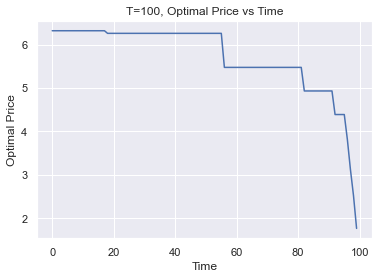

In [84]:
sns.lineplot(time_100, optimal_prices_t100)
plt.ylabel('Optimal Price')
plt.xlabel('Time')
plt.title('T=100, Optimal Price vs Time');

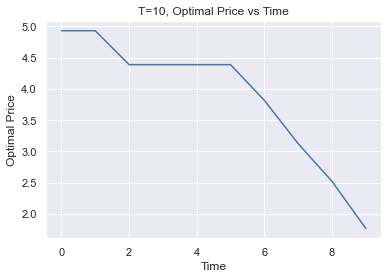

In [85]:
sns.lineplot(time_10, optimal_prices_t10)
plt.ylabel('Optimal Price')
plt.xlabel('Time')
plt.title('T=10, Optimal Price vs Time');

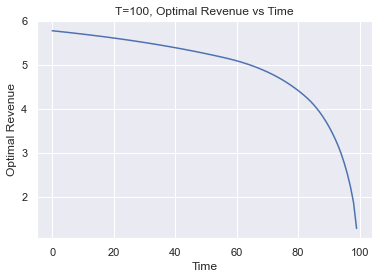

In [88]:
sns.lineplot(time_100, optimal_revenues_t100)
plt.ylabel('Optimal Revenue')
plt.xlabel('Time')
plt.title('T=100, Optimal Revenue vs Time');

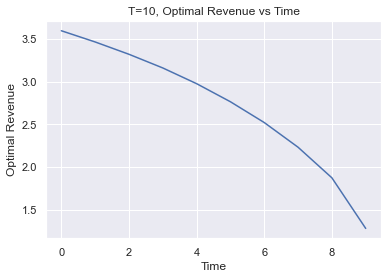

In [89]:
sns.lineplot(time_10, optimal_revenues_t10)
plt.ylabel('Optimal Revenue')
plt.xlabel('Time')
plt.title('T=10, Optimal Revenue vs Time');

### 3c) [Bonus, 3 points] Prices over time with multiple copies

<font color='blue'> Now, suppose that you have $K$ copies of the item, that you must sell over a time period $T$. Implement the two-dimensional dynamic program as discussed in class. Plot a line plot where the X axis is time as in 3b, but now you have $K$ lines where each line indicates the price at time $T$ if you have $K$ items left. 
    
Hint: As in 3a and 3b, you may find it useful to first optimize the price $p_{t,k}$ given the values $V_{t+1, k}$, $V_{t+1, k-1}$. Then, have a 2nd function that loops through $t, k$ in an appropriate order. 

In [128]:
def capacity_get_single_step_revenue_maximizing_price_and_revenue(Vtplus1k, Vtplus1kless1, price_options, demand_predictions):
    expected_revenues = []

    for option in range(len(price_options)):
        expected_revenue = demand_predictions[option]*(price_options[option] + Vtplus1kless1) + (1 - demand_predictions[option]) * Vtplus1k
        expected_revenues.append(expected_revenue)

    best_option = np.argmax(expected_revenues)
    return price_options[best_option], expected_revenues[best_option]

In [152]:
def capacity_get_prices_over_time_and_expected_revenue(prices, demand_predictions, T, K):
    optimal_prices = np.zeros([K+1, T+1])
    optimal_revenues = np.zeros([K+1, T+1])

    for t in range(T-1,-1, -1):
        for k in range(K,-1,-1):

            if k == 1:
                optimal_revenues[k-1,t] = 0

            best_price, best_revenue = capacity_get_single_step_revenue_maximizing_price_and_revenue(optimal_revenues[k,t+1], optimal_revenues[k-1,t+1], prices, demand_predictions)
            optimal_revenues[k,t] = best_revenue
            optimal_prices[k,t] = best_price

    return optimal_prices, optimal_revenues

In [153]:
capacity_get_single_step_revenue_maximizing_price_and_revenue(10, 20, price_options, demand_predictions)

(0.56, 20.40238805970149)

In [154]:
price_matrix, revenue_matrix = capacity_get_prices_over_time_and_expected_revenue(price_options, demand_predictions, 100, 10)

<AxesSubplot:>

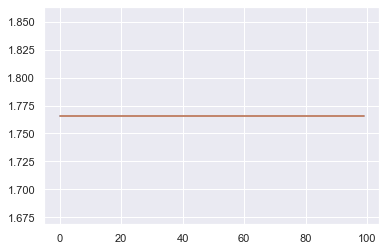

In [146]:
sns.lineplot(time_100, price_matrix[8,0:100])
sns.lineplot(time_100, price_matrix[4,0:100])

In [155]:
pd.DataFrame(revenue_matrix)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0
1,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0
2,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0
3,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0
4,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0
5,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0
6,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0
7,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0
8,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0
9,127.882759,126.603931,125.325103,124.046276,122.767448,121.488621,120.209793,118.930966,117.652138,116.37331,...,11.509448,10.230621,8.951793,7.672966,6.394138,5.11531,3.836483,2.557655,1.278828,0.0


In [ ]:





-























